# Prediksi Penyakit Asma - Exploratory Data Analysis

---



Kami akan melakukan analisis data eksplorasi pada kumpulan data Kaggle [Prediksi Penyakit Asma] (https://www.kaggle.com/datasets/deepayanthakur/asthma-disease-prediction) by Deepayan Thakur. Dataset ini merupakan kumpulan komprehensif berbagai gejala dan faktor dari pasien dengan atau tanpa asma. Tujuan dari proyek ini adalah untuk membangun model pembelajaran mesin yang dapat memprediksi apakah seorang pasien menderita asma atau tidak berdasarkan gejala dan faktornya, dan jika ya, seberapa parah asmanya.

## Pengaturan Awal

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##Pemuatan data dan pemeriksaan awal




In [3]:
# Read the dataset from a csv file
data = pd.read_csv('/content/drive/MyDrive/DS29/processed-data.csv')
data.head()

,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,None_Experiencing,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Severity_Mild,Severity_Moderate,Severity_None
0,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,1,0,0
1,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,1,0,0
2,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,1,0,0
3,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,0,1,0
4,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,0,1,0


#Data Cleaning and Pre-processing

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316800 entries, 0 to 316799
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype
---  ------                   --------------   -----
 0   Tiredness                316800 non-null  int64
 1   Dry-Cough                316800 non-null  int64
 2   Difficulty-in-Breathing  316800 non-null  int64
 3   Sore-Throat              316800 non-null  int64
 4   None_Sympton             316800 non-null  int64
 5   Pains                    316800 non-null  int64
 6   Nasal-Congestion         316800 non-null  int64
 7   Runny-Nose               316800 non-null  int64
 8   None_Experiencing        316800 non-null  int64
 9   Age_0-9                  316800 non-null  int64
 10  Age_10-19                316800 non-null  int64
 11  Age_20-24                316800 non-null  int64
 12  Age_25-59                316800 non-null  int64
 13  Age_60+                  316800 non-null  int64
 14  Gender_Female            316800 non-

Kita simpulkan dari analisis awal ini, kumpulan data terdiri dari 316.800 baris data dan 19 kolom. Kumpulan data ini cukup bersih, karena tidak ada nilai yang hilang dan semua fitur bersifat numerik (dalam hal ini dikodekan sebagai 0 atau 1).



## Hapus data duplikat
#jumlah baris data setelah dibersihkan dari duplikasi berjumlah **5760**

In [5]:
data.drop_duplicates(keep="first",inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5760 entries, 0 to 31677
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Tiredness                5760 non-null   int64
 1   Dry-Cough                5760 non-null   int64
 2   Difficulty-in-Breathing  5760 non-null   int64
 3   Sore-Throat              5760 non-null   int64
 4   None_Sympton             5760 non-null   int64
 5   Pains                    5760 non-null   int64
 6   Nasal-Congestion         5760 non-null   int64
 7   Runny-Nose               5760 non-null   int64
 8   None_Experiencing        5760 non-null   int64
 9   Age_0-9                  5760 non-null   int64
 10  Age_10-19                5760 non-null   int64
 11  Age_20-24                5760 non-null   int64
 12  Age_25-59                5760 non-null   int64
 13  Age_60+                  5760 non-null   int64
 14  Gender_Female            5760 non-null   int64
 15  Gen

##Severity
Menyatukan 3 Column Target menjadi 1 Column Severity dengan kategori 3 tingkat keparahan

In [6]:
# Severity Column

# Create a temporary dataframe with the severity columns

temp_severity = data[['Severity_None', 'Severity_Moderate', 'Severity_Mild']]

# Create a new column with the severity range

temp_severity['Severity'] = temp_severity.idxmax(axis=1)

# Drop the prefix from the column name

temp_severity['Severity'] = temp_severity['Severity'].str.replace('Severity_', '')

# Drop the one-hot encoded columns from the temporary dataframe

temp_severity = temp_severity.drop(['Severity_Mild', 'Severity_Moderate', 'Severity_None'], axis=1)

# Drop the one-hot encoded columns from the original dataframe

data = data.drop(['Severity_Mild', 'Severity_Moderate', 'Severity_None'], axis=1)

# Add the new column to the original dataframe

data['Severity'] = temp_severity['Severity']

<ipython-input-6-a301cdd60067>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_severity['Severity'] = temp_severity.idxmax(axis=1)
<ipython-input-6-a301cdd60067>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_severity['Severity'] = temp_severity['Severity'].str.replace('Severity_', '')


Pada bagian ini, kita akan menyiapkan kerangka data untuk analisis data eksplorasi. Kami akan membalikkan pengkodean fitur tingkat keparahan, kemudian mengubahnya menjadi fitur kategorikal. Kami juga akan mengganti nama beberapa kolom dan nilainya agar lebih mudah dibaca.

In [7]:
# Membuat dictionary yang akan digunakan untuk mengganti nilai teks dengan angka
severity_mapping = {
    'Mild': 1,
    'Moderate': 2,
    'None': 0
}

# Mengganti nilai teks dengan angka dalam kolom 'Severity'
data['Severity'] = data['Severity'].map(severity_mapping)

# Menampilkan  baris  dari DataFrame yang telah diubah

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5760 entries, 0 to 31677
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Tiredness                5760 non-null   int64
 1   Dry-Cough                5760 non-null   int64
 2   Difficulty-in-Breathing  5760 non-null   int64
 3   Sore-Throat              5760 non-null   int64
 4   None_Sympton             5760 non-null   int64
 5   Pains                    5760 non-null   int64
 6   Nasal-Congestion         5760 non-null   int64
 7   Runny-Nose               5760 non-null   int64
 8   None_Experiencing        5760 non-null   int64
 9   Age_0-9                  5760 non-null   int64
 10  Age_10-19                5760 non-null   int64
 11  Age_20-24                5760 non-null   int64
 12  Age_25-59                5760 non-null   int64
 13  Age_60+                  5760 non-null   int64
 14  Gender_Female            5760 non-null   int64
 15  Gen

# Imbalanced ke-1
baris data dengan tingkat Severity antara 0,1, dan 2 berbeda maka perlu diseimbangkan
Severity 0: 2880 -> 1440
Severity 1: 1440
Severity 2: 1440


In [9]:
# Get the severity column
severity = data["Severity"]

# Calculate the number of rows for each condition
count_1 = (severity == 0).sum()
count_2 = (severity == 1).sum()
count_3 = (severity == 2).sum()

# Print the results
print("Severity 0:", count_1)
print("Severity 1:", count_2)
print("Severity 2:", count_3)

Severity 0: 2880
Severity 1: 1440
Severity 2: 1440


In [10]:
# Hitung jumlah data untuk setiap nilai Severity
severity_counts = data['Severity'].value_counts()

# Tentukan jumlah sampel yang akan diambil dari kelas Severity = 0
undersample_size = severity_counts[1]  # Kami akan mengambil jumlah sampel yang sama dari Severity = 0 dan 2

# Bagi data menjadi dua bagian: satu dengan Severity = 0 dan satu dengan Severity != 0
severity_0 = data[data['Severity'] == 0]
severity_others = data[data['Severity'] != 0]

# Ambil sampel acak dari kelas Severity = 0 sejumlah sampel yang diambil dari Severity != 0
undersampled_severity_0 = severity_0.sample(n=undersample_size, random_state=42)

# Gabungkan kembali sampel Severity != 0 dengan sampel Severity = 0 yang sudah diambil
balanced_data = pd.concat([undersampled_severity_0, severity_others])

# Sekarang 'balanced_data' berisi data yang sudah seimbang

In [11]:
shape = balanced_data.shape
print(f'The dataset has {shape[0]} rows and {shape[1]} columns.')
# Get the severity column
severity = balanced_data["Severity"]

# Calculate the number of rows for each condition
count_1 = (severity == 0).sum()
count_2 = (severity == 1).sum()
count_3 = (severity == 2).sum()

# Print the results
print("Severity 0:", count_1)
print("Severity 1:", count_2)
print("Severity 2:", count_3)
balanced_data.info()
balanced_data.head()

The dataset has 4320 rows and 17 columns.
Severity 0: 1440
Severity 1: 1440
Severity 2: 1440
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4320 entries, 5469 to 31671
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Tiredness                4320 non-null   int64
 1   Dry-Cough                4320 non-null   int64
 2   Difficulty-in-Breathing  4320 non-null   int64
 3   Sore-Throat              4320 non-null   int64
 4   None_Sympton             4320 non-null   int64
 5   Pains                    4320 non-null   int64
 6   Nasal-Congestion         4320 non-null   int64
 7   Runny-Nose               4320 non-null   int64
 8   None_Experiencing        4320 non-null   int64
 9   Age_0-9                  4320 non-null   int64
 10  Age_10-19                4320 non-null   int64
 11  Age_20-24                4320 non-null   int64
 12  Age_25-59                4320 non-null   int64
 13  Age_60+    

,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,None_Experiencing,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Severity
5469,0,1,1,1,0,0,1,1,0,1,0,0,0,0,0,0,0
16221,0,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0
25953,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0
17433,0,0,0,0,0,1,1,1,0,0,0,1,0,0,0,0,0
12198,0,0,1,1,0,0,1,1,0,0,1,0,0,0,0,0,0


# Uji coba model Ke-1

In [12]:
# Memisahkan fitur dan target
X = balanced_data.drop('Severity', axis=1)
y = balanced_data['Severity']
#Split data menjadi train dan test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=500)
# Buat dan latih model logistic regression
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
# Membuat prediksi pada data pengujian
y_pred = model.predict(X_test)

# Mengukur akurasi model pada data pengujian
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi Model logistic regression : ", accuracy)

Akurasi Model logistic regression :  0.29398148148148145


##Z-Score Outlier
Karena akurasi masih kecil dimungkinka ada data outlier maka dilakukan pembersihan memakai Z-Score

In [13]:
from scipy import stats
import numpy as np
from sklearn.preprocessing import MinMaxScaler
# Identifikasi dan Hapus Outlier dengan Z-score
z_scores = np.abs(stats.zscore(balanced_data))
threshold = 3
data_cleaned = balanced_data[(z_scores < threshold).all(axis=1)]
print(data_cleaned)

       Tiredness  Dry-Cough  Difficulty-in-Breathing  Sore-Throat  \
5469           0          1                        1            1   
16221          0          1                        1            0   
25953          0          0                        0            0   
17433          0          0                        0            0   
12198          0          0                        1            1   
...          ...        ...                      ...          ...   
31503          0          0                        0            1   
31524          0          0                        0            1   
31527          0          0                        0            1   
31536          0          0                        0            1   
31539          0          0                        0            1   

       None_Sympton  Pains  Nasal-Congestion  Runny-Nose  None_Experiencing  \
5469              0      0                 1           1                  0   
16221        

# Imbalance ke-2

In [14]:
shape = data_cleaned.shape
print(f'The dataset has {shape[0]} rows and {shape[1]} columns.')
# Get the severity column
severity = data_cleaned["Severity"]

# Calculate the number of rows for each condition
count_1 = (severity == 0).sum()
count_2 = (severity == 1).sum()
count_3 = (severity == 2).sum()

# Print the results
print("Severity 0:", count_1)
print("Severity 1:", count_2)
print("Severity 2:", count_3)
data_cleaned.info()
data_cleaned.head()

The dataset has 3968 rows and 17 columns.
Severity 0: 1328
Severity 1: 1320
Severity 2: 1320
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3968 entries, 5469 to 31539
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Tiredness                3968 non-null   int64
 1   Dry-Cough                3968 non-null   int64
 2   Difficulty-in-Breathing  3968 non-null   int64
 3   Sore-Throat              3968 non-null   int64
 4   None_Sympton             3968 non-null   int64
 5   Pains                    3968 non-null   int64
 6   Nasal-Congestion         3968 non-null   int64
 7   Runny-Nose               3968 non-null   int64
 8   None_Experiencing        3968 non-null   int64
 9   Age_0-9                  3968 non-null   int64
 10  Age_10-19                3968 non-null   int64
 11  Age_20-24                3968 non-null   int64
 12  Age_25-59                3968 non-null   int64
 13  Age_60+    

,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,None_Experiencing,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Severity
5469,0,1,1,1,0,0,1,1,0,1,0,0,0,0,0,0,0
16221,0,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0
25953,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0
17433,0,0,0,0,0,1,1,1,0,0,0,1,0,0,0,0,0
12198,0,0,1,1,0,0,1,1,0,0,1,0,0,0,0,0,0


In [15]:
# Hitung jumlah data untuk setiap nilai Severity
severity_counts = data_cleaned['Severity'].value_counts()

# Tentukan jumlah sampel yang akan diambil dari kelas Severity = 0
undersample_size = severity_counts[1]  # Kami akan mengambil jumlah sampel yang sama dari Severity = 0 dan 2

# Bagi data menjadi dua bagian: satu dengan Severity = 0 dan satu dengan Severity != 0
severity_0 = data_cleaned[data_cleaned['Severity'] == 0]
severity_others = data_cleaned[data_cleaned['Severity'] != 0]

# Ambil sampel acak dari kelas Severity = 0 sejumlah sampel yang diambil dari Severity != 0
undersampled_severity_0 = severity_0.sample(n=undersample_size, random_state=42)

# Gabungkan kembali sampel Severity != 0 dengan sampel Severity = 0 yang sudah diambil
fix_data = pd.concat([undersampled_severity_0, severity_others])

# Sekarang 'balanced_data' berisi data yang sudah seimbang

In [16]:
shape = fix_data.shape
print(f'The dataset has {shape[0]} rows and {shape[1]} columns.')
# Get the severity column
severity = fix_data["Severity"]

# Calculate the number of rows for each condition
count_1 = (severity == 0).sum()
count_2 = (severity == 1).sum()
count_3 = (severity == 2).sum()

# Print the results
print("Severity 0:", count_1)
print("Severity 1:", count_2)
print("Severity 2:", count_3)
fix_data.info()
fix_data.head()

The dataset has 3960 rows and 17 columns.
Severity 0: 1320
Severity 1: 1320
Severity 2: 1320
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3960 entries, 21462 to 31539
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Tiredness                3960 non-null   int64
 1   Dry-Cough                3960 non-null   int64
 2   Difficulty-in-Breathing  3960 non-null   int64
 3   Sore-Throat              3960 non-null   int64
 4   None_Sympton             3960 non-null   int64
 5   Pains                    3960 non-null   int64
 6   Nasal-Congestion         3960 non-null   int64
 7   Runny-Nose               3960 non-null   int64
 8   None_Experiencing        3960 non-null   int64
 9   Age_0-9                  3960 non-null   int64
 10  Age_10-19                3960 non-null   int64
 11  Age_20-24                3960 non-null   int64
 12  Age_25-59                3960 non-null   int64
 13  Age_60+   

,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,None_Experiencing,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Severity
21462,1,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0
6585,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
10329,0,0,0,1,0,1,1,0,0,0,1,0,0,0,1,0,0
6498,1,1,1,0,0,1,1,0,0,0,1,0,0,0,0,1,0
2154,1,1,1,1,0,1,0,0,0,1,0,0,0,0,1,0,0


# one-hot encoding

Artinya, data tidak memerlukan banyak pembersihan dan pra-pemrosesan untuk model pembelajaran mesin. Namun, untuk keperluan analisis data eksplorasi ini, perlu dilakukan beberapa manipulasi data (membalikkan pengkodean one-hot dan mengubah fitur-fitur tersebut menjadi fitur kategorikal) untuk membantu visualisasi data.

## age

In [17]:
## Reverse one-hot encoding
# Age column
# data sementara dengan  age columns
temp_age = fix_data[['Age_0-9', 'Age_10-19', 'Age_20-24', 'Age_25-59', 'Age_60+']]

# Buat kolom baru Age_range
temp_age['Age'] = temp_age.idxmax(axis=1)

# Drop the prefix from the column name
temp_age['Age'] = temp_age['Age'].str.replace('Age_', '')

# Drop the one-hot encoded columns from the temporary dataframe
temp_age = temp_age.drop(['Age_0-9', 'Age_10-19', 'Age_20-24', 'Age_25-59', 'Age_60+'], axis=1)

# Drop the one-hot encoded columns from the original dataframe
fix_data = fix_data.drop(['Age_0-9', 'Age_10-19', 'Age_20-24', 'Age_25-59', 'Age_60+'], axis=1)

# Add the new column to the original dataframe
fix_data['Age_range'] = temp_age['Age']

# Membuat dictionary yang akan digunakan untuk mengganti nilai teks dengan angka
age_mapping = {
    '0-9': 0,
    '10-19': 1,
    '20-24': 2,
    '25-59': 3,
    '60+': 4
}

# Mengganti nilai teks dengan angka dalam kolom 'Age_range'
fix_data['Age_range'] = fix_data['Age_range'].map(age_mapping)

<ipython-input-17-db50752a3ebf>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_age['Age'] = temp_age.idxmax(axis=1)
<ipython-input-17-db50752a3ebf>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_age['Age'] = temp_age['Age'].str.replace('Age_', '')


## gender

In [18]:
# Gender Column

# Create a temporary dataframe with the gender columns

temp_gender = fix_data[['Gender_Male', 'Gender_Female']]

# Create a new column with the gender

temp_gender['Gender'] = temp_gender.idxmax(axis=1)

# Drop the prefix from the column name

temp_gender['Gender'] = temp_gender['Gender'].str.replace('Gender_', '')

# Drop the one-hot encoded columns from the temporary dataframe

temp_gender = temp_gender.drop(['Gender_Male', 'Gender_Female'], axis=1)

# Drop the one-hot encoded columns from the original dataframe

fix_data = fix_data.drop(['Gender_Male', 'Gender_Female'], axis=1)

# Add the new column to the original dataframe

fix_data['Gender'] = temp_gender['Gender']

# Membuat dictionary yang akan digunakan untuk mengganti nilai teks dengan angka
gender_mapping = {
    'Male': 0,
    'Female': 1
}

# Mengganti nilai teks dengan angka dalam kolom 'Gender'
fix_data['Gender'] = fix_data['Gender'].map(gender_mapping)

<ipython-input-18-9daa627c35b2>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_gender['Gender'] = temp_gender.idxmax(axis=1)
<ipython-input-18-9daa627c35b2>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_gender['Gender'] = temp_gender['Gender'].str.replace('Gender_', '')


In [19]:
# Ubah urutan indeks
fix_data = fix_data.reindex(columns=['Tiredness', 'Dry-Cough', 'Difficulty-in-Breathing', 'Sore-Throat', 'None_Symptom', 'Pains', 'Nasal-Congestion', 'Runny-Nose','None_Experiencing', 'Age_range', 'Gender', 'Severity'])

fix_data.head()

,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Symptom,Pains,Nasal-Congestion,Runny-Nose,None_Experiencing,Age_range,Gender,Severity
21462,1,1,0,0,NaN,0,1,0,0,3,1,0
6585,1,1,1,0,NaN,0,0,0,0,1,0,0
10329,0,0,0,1,NaN,1,1,0,0,1,1,0
6498,1,1,1,0,NaN,1,1,0,0,1,0,0
2154,1,1,1,1,NaN,1,0,0,0,0,1,0


In [20]:
fix_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3960 entries, 21462 to 31539
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Tiredness                3960 non-null   int64  
 1   Dry-Cough                3960 non-null   int64  
 2   Difficulty-in-Breathing  3960 non-null   int64  
 3   Sore-Throat              3960 non-null   int64  
 4   None_Symptom             0 non-null      float64
 5   Pains                    3960 non-null   int64  
 6   Nasal-Congestion         3960 non-null   int64  
 7   Runny-Nose               3960 non-null   int64  
 8   None_Experiencing        3960 non-null   int64  
 9   Age_range                3960 non-null   int64  
 10  Gender                   3960 non-null   int64  
 11  Severity                 3960 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 402.2 KB


##Keterkaitan antar column

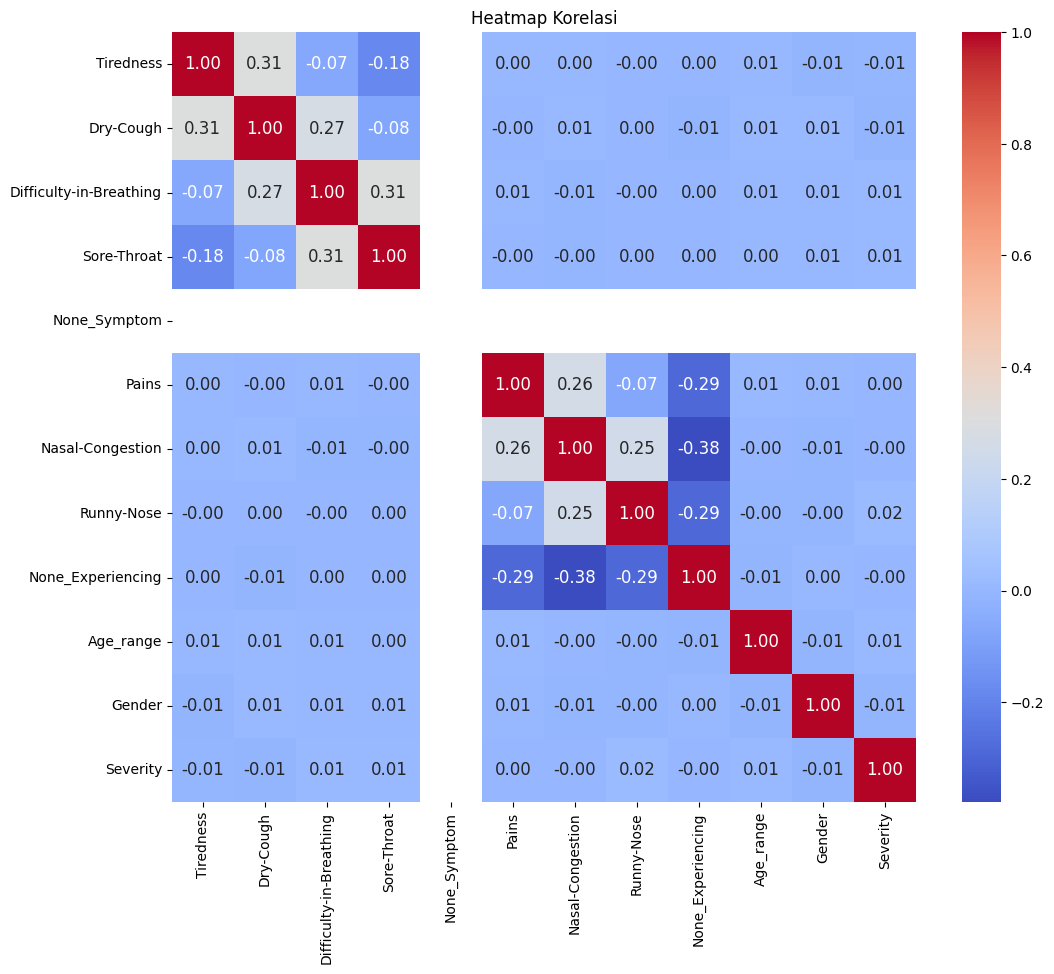

In [21]:
# Heatmap
# Generate the heatmap with larger figure size
plt.figure(figsize=(12, 10))  # Ubah ukuran sesuai kebutuhan Anda

# Create a heatmap with annotations
heatmap = sns.heatmap(fix_data.corr(), annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 12})

# Tambahkan judul heatmap
plt.title("Heatmap Korelasi")

# Tampilkan heatmap
plt.show()

## scalar

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming you have the model already trained
# model = LogisticRegression()

# Misalkan Anda memiliki data fitur (X) dan label/target (y)
X = fix_data.drop(columns=['None_Symptom', 'None_Experiencing','Severity'], axis=1)
y = fix_data['Severity']

# Inisialisasi scaler
scaler = StandardScaler()

# Menggunakan scaler untuk mengubah data ke skala
scaled_X = scaler.fit_transform(X)

# Membagi data menjadi data pelatihan dan data validasi
X_train, X_val, y_train, y_val = train_test_split(scaled_X, y, test_size=0.2, random_state=42)

# Melatih model pada data pelatihan
model.fit(X_train, y_train)

# Melakukan prediksi pada data validasi
y_pred = model.predict(X_val)

# Mengukur akurasi model pada data validasi
accuracy = accuracy_score(y_val, y_pred)
print(f"Akurasi model setelah mengembalikan data ke skala aslinya: {accuracy}")

Akurasi model setelah mengembalikan data ke skala aslinya: 0.30808080808080807


# matrik kebingungan

In [23]:
# Memisahkan fitur dan target
# Misalkan Anda memiliki data fitur (X) dan label/target (y)
X = fix_data.drop(columns=['None_Symptom', 'Severity'], axis=1)
y = fix_data['Severity']
#Split data menjadi train dan test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.99, random_state=3000)
# Buat dan latih model logistic regression
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
# Membuat prediksi pada data pengujian
y_pred = model.predict(X_test)

# Mengukur akurasi model pada data pengujian
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi Model logistic regression : ", accuracy)

Akurasi Model logistic regression :  0.3343534812547819


In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Hitung confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Menampilkan data yang diuji (y_test) dan hasil prediksi (y_pred)
#for actual, predicted in zip(y_test, y_pred):
#    print("Actual:", actual, "| Predicted:", predicted)
# Membuat DataFrame dari data uji (X_test) bersama dengan hasil prediksi model (y_pred)
df_test = pd.DataFrame(X_test, columns=X.columns)  # Menggunakan nama kolom dari X
df_test['Actual'] = y_test
df_test['Predicted'] = y_pred

# Menampilkan DataFrame
print(df_test)
# Simpan DataFrame ke dalam file CSV
#df_test.to_csv('data_uji_dan_prediksi.csv', index=False)

# Tampilkan confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

       Tiredness  Dry-Cough  Difficulty-in-Breathing  Sore-Throat  Pains  \
16329          0          1                        0            0      0   
15075          1          1                        0            0      1   
14811          1          1                        1            1      1   
21552          1          0                        0            0      1   
24972          0          0                        1            0      1   
...          ...        ...                      ...          ...    ...   
29028          0          1                        0            0      0   
20907          0          0                        0            1      0   
14235          0          1                        0            0      0   
25383          1          1                        1            1      1   
21561          1          0                        0            0      1   

       Nasal-Congestion  Runny-Nose  None_Experiencing  Age_range  Gender  \
16329     

Baris pertama menggambarkan label "Mild" pada data pengujian:

576 data dengan label "Mild" diprediksi dengan benar sebagai "Mild" (True Positive untuk "Mild").
440 data dengan label "Mild" salah diprediksi sebagai "Moderate" (False Negative untuk "Mild").
291 data dengan label "Mild" salah diprediksi sebagai "None" (False Negative untuk "Mild").

Baris kedua menggambarkan label "Moderate" pada data pengujian:

568 data dengan label "Moderate" salah diprediksi sebagai "Mild" (False Negative untuk "Moderate").
436 data dengan label "Moderate" diprediksi dengan benar sebagai "Moderate" (True Positive untuk "Moderate").
302 data dengan label "Moderate" salah diprediksi sebagai "None" (False Negative untuk "Moderate").

Baris ketiga menggambarkan label "None" pada data pengujian:

569 data dengan label "None" salah diprediksi sebagai "Mild" (False Negative untuk "None").
440 data dengan label "None" salah diprediksi sebagai "Moderate" (False Negative untuk "None").
299 data dengan label "None" diprediksi dengan benar sebagai "None" (True Positive untuk "None").

Akurasi: 0.33
Presisi: 0.33
Recall: 0.33
F1-Score: 0.33


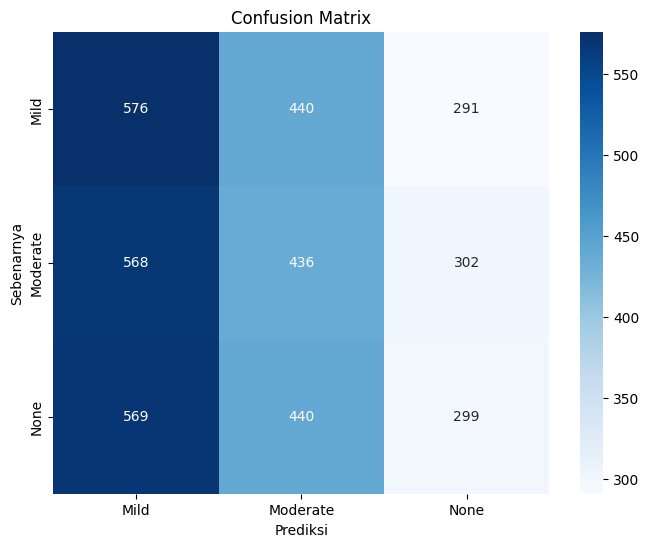

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Menghitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Akurasi: {accuracy:.2f}")
print(f"Presisi: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Mild', 'Moderate', 'None'], yticklabels=['Mild', 'Moderate', 'None'])
plt.xlabel('Prediksi')
plt.ylabel('Sebenarnya')
plt.title('Confusion Matrix')
plt.show()

# manipulasi data

In [26]:
# Filter baris data ketika nilai kolom Actual sama dengan kolom Predicted
df_filtered = df_test[df_test['Actual'] == df_test['Predicted']]

# Menampilkan DataFrame yang telah difilter
print(df_filtered)

# Mengganti nama kolom "Actual" menjadi "Severity"
df_filtered.rename(columns={'Actual': 'Severity'}, inplace=True)

# Menghilangkan kolom "Predicted"
df_filtered .drop(columns=['Predicted'], inplace=True)

# Menampilkan DataFrame yang telah diubah
print(df_filtered)

       Tiredness  Dry-Cough  Difficulty-in-Breathing  Sore-Throat  Pains  \
16329          0          1                        0            0      0   
21552          1          0                        0            0      1   
24972          0          0                        1            0      1   
27924          1          0                        0            0      0   
420            1          0                        0            0      1   
...          ...        ...                      ...          ...    ...   
17286          1          1                        0            0      0   
15084          1          1                        0            0      1   
23835          0          0                        0            0      0   
20907          0          0                        0            1      0   
25383          1          1                        1            1      1   

       Nasal-Congestion  Runny-Nose  None_Experiencing  Age_range  Gender  \
16329     

<ipython-input-26-37d160766000>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.rename(columns={'Actual': 'Severity'}, inplace=True)
<ipython-input-26-37d160766000>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered .drop(columns=['Predicted'], inplace=True)


# model

In [27]:
# Memisahkan fitur dan target
X = df_filtered.drop('Severity', axis=1)
y = df_filtered['Severity']
#Split data menjadi train dan test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=500)
# Buat dan latih model logistic regression
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
# Membuat prediksi pada data pengujian
y_pred = model.predict(X_test)

# Mengukur akurasi model pada data pengujian
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi Model logistic regression : ", accuracy)

Akurasi Model logistic regression :  0.9809885931558935


In [28]:
# Hitung confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[120   1   1]
 [  0  90   0]
 [  2   1  48]]


Berdasarkan hasil training ketiga model diatas, kami memilih Logistic Regression model untuk kami gunakan karena memiliki nilai akurasi paling tinggi (Accuracy: 0.9809885931558935)

In [29]:
import pickle
with open("model.pkl", "wb") as file:
    pickle.dump(model, file)